In [197]:
from futu import *
############################ 全局变量设置 ############################
FUTUOPEND_ADDRESS = '127.0.0.1'  # FutuOpenD 监听地址
FUTUOPEND_PORT = 11111  # FutuOpenD 监听端口

TRADING_ENVIRONMENT = TrdEnv.SIMULATE  # 交易环境：真实 / 模拟
TRADING_PWD = '914138'  # 交易密码，用于解锁交易
# TRADING_PERIOD = KLType.K_1M  # 信号 K 线周期
TRADING_PERIOD = KLType.K_DAY
TRADING_SECURITY = 'HK.00700'  # 交易标的
# FAST_MOVING_AVERAGE = 5  # 均线快线的周期
# SLOW_MOVING_AVERAGE = 10  # 均线慢线的周期
SUBSCRIBE_NUM_THRESHOLD = 20
quote_context = OpenQuoteContext(
    host=FUTUOPEND_ADDRESS, port=FUTUOPEND_PORT)  # 行情对象
trade_context = OpenHKTradeContext(
    host=FUTUOPEND_ADDRESS, port=FUTUOPEND_PORT,
    security_firm=SecurityFirm.FUTUSECURITIES)  # 交易对象，根据交易标的修改交易对象类型

2023-01-29 00:02:33,753 | 11584 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=7, host=127.0.0.1, port=11111, user_id=16767859
2023-01-29 00:02:33,756 | 11584 | [open_context_base.py] _send_init_connect_sync:311: InitConnect ok: conn_id=8, host=127.0.0.1, port=11111, user_id=16767859


### Function for querying daily data via FUTU API with one single stock code

In [198]:
def query_data(code, start_time, end_time, quote_context: OpenQuoteContext):
    try:
        ret, data, page_req_key = quote_context.request_history_kline(code, start=start_time, end=end_time, 
                                                                          max_count=1000, ktype=SubType.K_DAY, 
                                                                          autype=AuType.NONE)
        data = data.set_index('time_key')
        return data
    except Exception as e:
        print(e)

In [199]:
code = "HK.03606"
start_time = "2021-01-01"
end_time = datetime.now().strftime("%Y-%m-%d")
data = query_data(code, start_time, end_time, quote_context=quote_context)
data

,code,open,close,high,low,pe_ratio,turnover_rate,volume,turnover,change_rate,last_close
time_key,,,,,,,,,,,
2021-01-04 00:00:00,HK.03606,42.70,45.15,46.05,42.70,35.495,0.01024,5178000,234047430.0,5.985915,42.60
2021-01-05 00:00:00,HK.03606,45.30,45.45,46.50,44.85,35.731,0.01803,9116000,415210030.0,0.664452,45.15
2021-01-06 00:00:00,HK.03606,45.45,44.15,45.45,43.60,34.709,0.01055,5336181,235168315.0,-2.860286,45.45
2021-01-07 00:00:00,HK.03606,44.15,43.95,44.55,43.35,34.551,0.00745,3764984,165775959.0,-0.453001,44.15
2021-01-08 00:00:00,HK.03606,44.55,45.80,47.35,44.50,36.006,0.01542,7795152,358387431.0,4.209329,43.95
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18 00:00:00,HK.03606,36.90,37.15,37.50,36.75,25.203,0.00268,1624005,60265987.0,0.541272,36.95
2023-01-19 00:00:00,HK.03606,37.00,37.50,37.85,37.00,25.440,0.00201,1221509,45796037.0,0.942127,37.15
2023-01-20 00:00:00,HK.03606,38.40,37.50,38.40,37.25,25.440,0.00267,1621413,60904395.0,0.000000,37.50


In [200]:
data[:14]

,code,open,close,high,low,pe_ratio,turnover_rate,volume,turnover,change_rate,last_close
time_key,,,,,,,,,,,
2021-01-04 00:00:00,HK.03606,42.70,45.15,46.05,42.70,35.495,0.01024,5178000,234047430.0,5.985915,42.60
2021-01-05 00:00:00,HK.03606,45.30,45.45,46.50,44.85,35.731,0.01803,9116000,415210030.0,0.664452,45.15
2021-01-06 00:00:00,HK.03606,45.45,44.15,45.45,43.60,34.709,0.01055,5336181,235168315.0,-2.860286,45.45
2021-01-07 00:00:00,HK.03606,44.15,43.95,44.55,43.35,34.551,0.00745,3764984,165775959.0,-0.453001,44.15
2021-01-08 00:00:00,HK.03606,44.55,45.80,47.35,44.50,36.006,0.01542,7795152,358387431.0,4.209329,43.95
2021-01-11 00:00:00,HK.03606,45.15,52.25,53.70,45.15,41.077,0.02243,11340751,584339148.0,14.082969,45.80
2021-01-12 00:00:00,HK.03606,52.20,50.00,52.20,48.50,39.308,0.01458,7371577,369740371.0,-4.306220,52.25
2021-01-13 00:00:00,HK.03606,49.60,50.40,53.60,49.60,39.622,0.02080,10515600,538911968.0,0.800000,50.00
2021-01-14 00:00:00,HK.03606,50.65,48.80,50.95,47.65,38.364,0.01418,7168982,349793515.0,-3.174603,50.40


### import math library to run numbers

In [201]:
import talib
import numpy as np

### stochastic oscillator calculation (KDJ)

In [202]:
# according to wikipedia, fastk_period with 5 to help calculate recent 5 days highest and lowest
fastk_period = 10
slowk_period = 3
slowd_period = 3
fastd_period = 3
slowk_matype = 0
slowd_matype = 0
fastd_matype = 0
slowk, slowd = talib.STOCH(
    high=data['high'], low=data['low'], close=data['close'], 
    fastk_period=fastk_period, slowk_period=slowk_period, slowd_period=slowd_period,
    slowk_matype=slowk_matype, slowd_matype=slowd_matype)
fastk, fastd = talib.STOCHF(
    high=data['high'], low=data['low'], close=data['close'],
    fastk_period=fastk_period, fastd_period=fastd_period,
    fastd_matype = fastd_matype 
)

SLOWK Line (MA smoothed FASTK over slowk period),
because fastk period = 5, and slowk period = 3, to get a slowk value 
at least fastk+slowk-1 trading days, and SLOWD Line (MA smoothed SLOWK over slowd period)
needs more slowd-1 days. So index begin with 2021-01-14.

In [203]:
print(slowk[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00          NaN
2021-01-20 00:00:00          NaN
2021-01-21 00:00:00    90.732310
2021-01-22 00:00:00    88.035707
2021-01-25 00:00:00    90.125565
2021-01-26 00:00:00    86.125498
2021-01-27 00:00:00    82.012195
2021-01-28 00:00:00    68.394309
2021-01-29 00:00:00    57.925461
dtype: float64


In [204]:
print(fastk[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00    95.734597
2021-01-20 00:00:00    87.937743
2021-01-21 00:00:00    88.524590
2021-01-22 00:00:00    87.644788
2021-01-25 00:00:00    94.207317
2021-01-26 00:00:00    76.524390
2021-01-27 00:00:00    75.304878
2021-01-28 00:00:00    53.353659
2021-01-29 00:00:00    45.117845
dtype: float64


In [205]:
print(slowd[:20])


time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00          NaN
2021-01-20 00:00:00          NaN
2021-01-21 00:00:00    84.084663
2021-01-22 00:00:00    88.693029
2021-01-25 00:00:00    89.631194
2021-01-26 00:00:00    88.095590
2021-01-27 00:00:00    86.087753
2021-01-28 00:00:00    78.844001
2021-01-29 00:00:00    69.443988
dtype: float64


In [206]:
print(fastd[:20])

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00          NaN
2021-01-19 00:00:00    74.210610
2021-01-20 00:00:00    87.311070
2021-01-21 00:00:00    90.732310
2021-01-22 00:00:00    88.035707
2021-01-25 00:00:00    90.125565
2021-01-26 00:00:00    86.125498
2021-01-27 00:00:00    82.012195
2021-01-28 00:00:00    68.394309
2021-01-29 00:00:00    57.925461
dtype: float64


### RSI Calculation

In [207]:
rsi_period = 10
rsi = talib.RSI(data['close'], timeperiod=rsi_period)
rsi[:15]

time_key
2021-01-04 00:00:00          NaN
2021-01-05 00:00:00          NaN
2021-01-06 00:00:00          NaN
2021-01-07 00:00:00          NaN
2021-01-08 00:00:00          NaN
2021-01-11 00:00:00          NaN
2021-01-12 00:00:00          NaN
2021-01-13 00:00:00          NaN
2021-01-14 00:00:00          NaN
2021-01-15 00:00:00          NaN
2021-01-18 00:00:00    67.027027
2021-01-19 00:00:00    70.563003
2021-01-20 00:00:00    72.527106
2021-01-21 00:00:00    73.587741
2021-01-22 00:00:00    75.525918
dtype: float64

### MACD Calculation

In [208]:
macd, macdsignal, macdhist = talib.MACD(data['close'], fastperiod=12, slowperiod=26, signalperiod=9)

### Import Plotting Lib

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

### Date formatting before drawing graphs

In [210]:
fastk.index = pd.to_datetime(fastk.index, format="%Y-%m-%d")
fastd.index = pd.to_datetime(fastd.index, format="%Y-%m-%d")
slowk.index = pd.to_datetime(slowk.index, format="%Y-%m-%d")
slowd.index = pd.to_datetime(slowd.index, format="%Y-%m-%d")

rsi.index = pd.to_datetime(rsi.index, format="%Y-%m-%d")
macd.index = pd.to_datetime(macd.index, format="%Y-%m-%d")
macdsignal.index = pd.to_datetime(macdsignal.index, format="%Y-%m-%d")

### Data Visualization

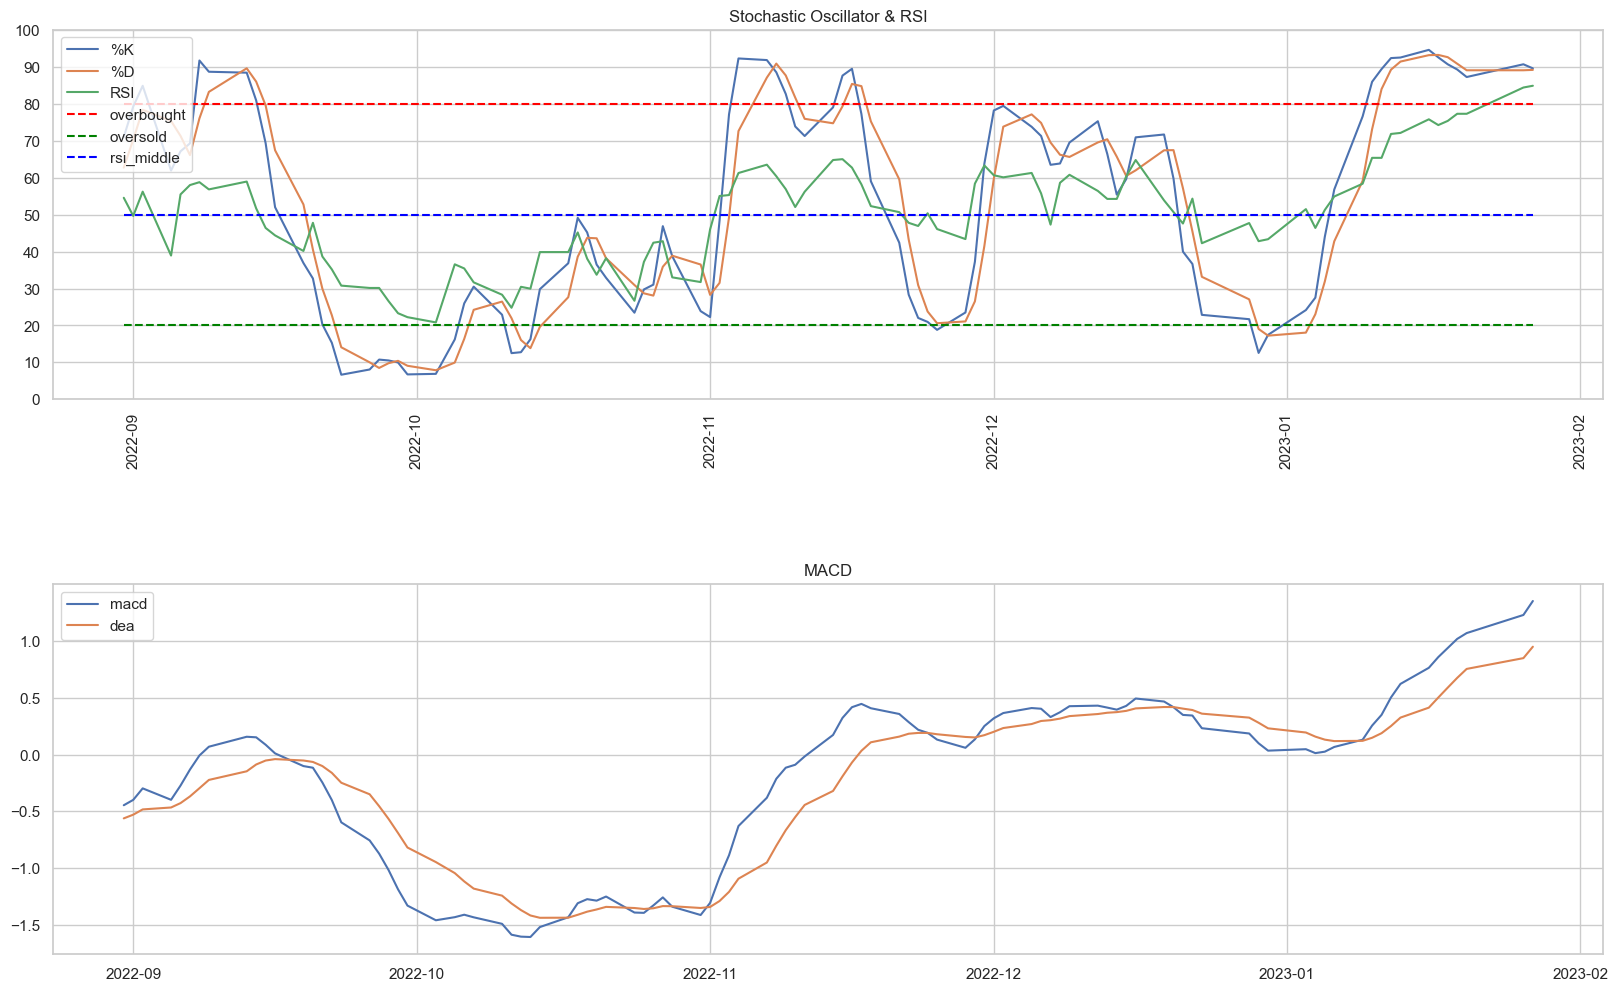

In [211]:
import matplotlib.dates as mdates

n = 100
overbought_threshold = 80
overbought = np.empty(n)
overbought.fill(overbought_threshold)

oversold_threshold= 20
oversold = np.empty(n)
oversold.fill(oversold_threshold)

rsi_middle_line = np.empty(n)
rsi_middle_line.fill(50)

# plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["font.size"] = "16"
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 1)
plt.xticks(rotation="vertical")
plt.yticks(np.arange(0, 110, 10))
plt.ylim(0, 100)
plt.plot(slowk.index[-n:], slowk[-n:], label="%K")
plt.plot(slowd.index[-n:], slowd[-n:], label="%D")
plt.plot(rsi.index[-n:], rsi[-n:], label="RSI")
plt.plot(slowk.index[-n:], overbought, label="overbought", color="red", linestyle="dashed")
plt.plot(slowk.index[-n:], oversold, label="oversold", color="green", linestyle="dashed")
plt.plot(rsi.index[-n:], rsi_middle_line, label="rsi_middle", color="blue", linestyle="dashed")
plt.legend(loc="upper left")
plt.title("Stochastic Oscillator & RSI")


plt.subplot(2, 1, 2)
plt.plot(macd.index[-n:], macd[-n:], label="macd")
plt.plot(macdsignal.index[-n:], macdsignal[-n:], label="dea")
plt.legend()
plt.title("MACD")

plt.show()

In [212]:
quote_context.close()
trade_context.close()

2023-01-29 00:02:34,733 | 11584 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=7
2023-01-29 00:02:34,734 | 11584 | [open_context_base.py] on_disconnect:383: Disconnected: conn_id=8
